# Predict Black Friday Sales


A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Data

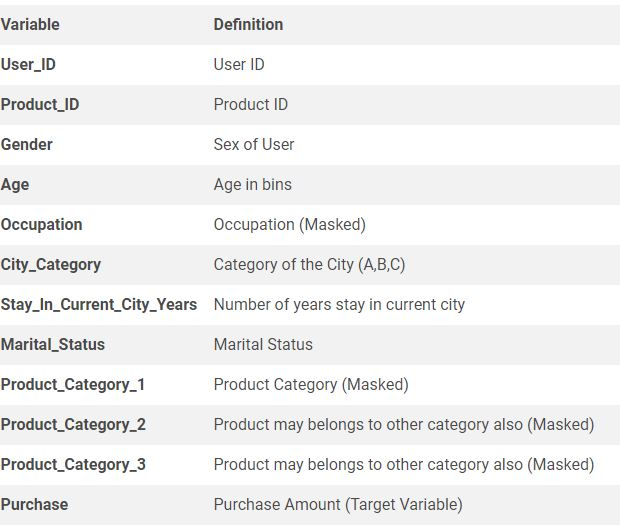


Your model performance will be evaluated on the basis of your prediction of the purchase amount for the test data (test.csv), which contains similar data-points as train except for their purchase amount. Your submission needs to be in the format as shown in "SampleSubmission.csv".

We at our end, have the actual purchase amount for the test dataset, against which your predictions will be evaluated. Submissions are scored on the root mean squared error (RMSE). RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors:

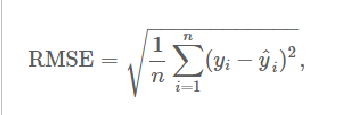

Where y hat is the predicted value and y is the original value.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
for i in df.columns:
    print(i,df[i].nunique())

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 20
Product_Category_2 17
Product_Category_3 15
Purchase 18105


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
t1 = pd.read_csv('test.csv')

In [6]:
for i in t1.columns:
    print (i+"--",t1[i].nunique())

User_ID-- 5891
Product_ID-- 3491
Gender-- 2
Age-- 7
Occupation-- 21
City_Category-- 3
Stay_In_Current_City_Years-- 5
Marital_Status-- 2
Product_Category_1-- 18
Product_Category_2-- 17
Product_Category_3-- 15


In [7]:
t1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

treating missing values
filling missing values with categorical value say -2 so that it can be treated as a seperate cateogry

In [8]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2)
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2)
t1['Product_Category_3'] = t1['Product_Category_3'].fillna(-2)
t1['Product_Category_2'] = t1['Product_Category_2'].fillna(-2)

In [9]:
for i in ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Stay_In_Current_City_Years', 'User_ID']:
    df[i] = df[i].astype('category')

In [10]:
df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category_1            category
Product_Category_2            category
Product_Category_3            category
Purchase                         int64
dtype: object

In [11]:
import seaborn as sns

In [12]:
cols1 = ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Stay_In_Current_City_Years']

Univariate Analysis

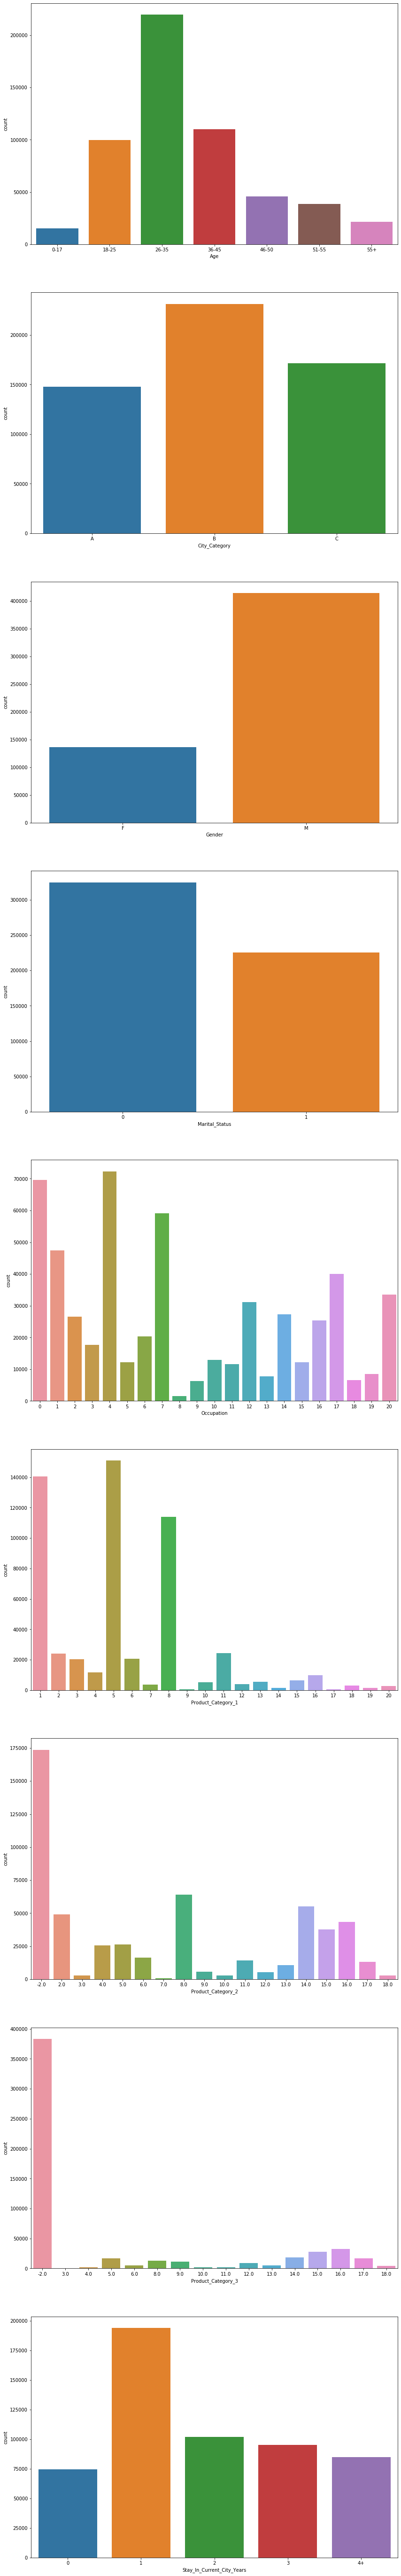

In [13]:
fig, (b1,b2,b3,b4,b5,b6,b7,b8,b9) = plt.subplots(nrows = 9, figsize = (14,100))
AX = [b1,b2,b3,b4,b5,b6,b7,b8,b9]

for i,j in zip(cols1,AX):
    sns.countplot(x = df[i],ax = j)

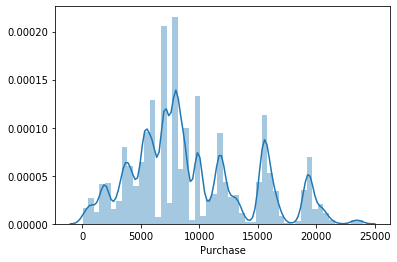

In [14]:
sns.distplot(df['Purchase'])

purchase variable is fairly normally distributed

In [15]:
cols = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

Bivariate Analysis
Analysing relationship of features with target variable

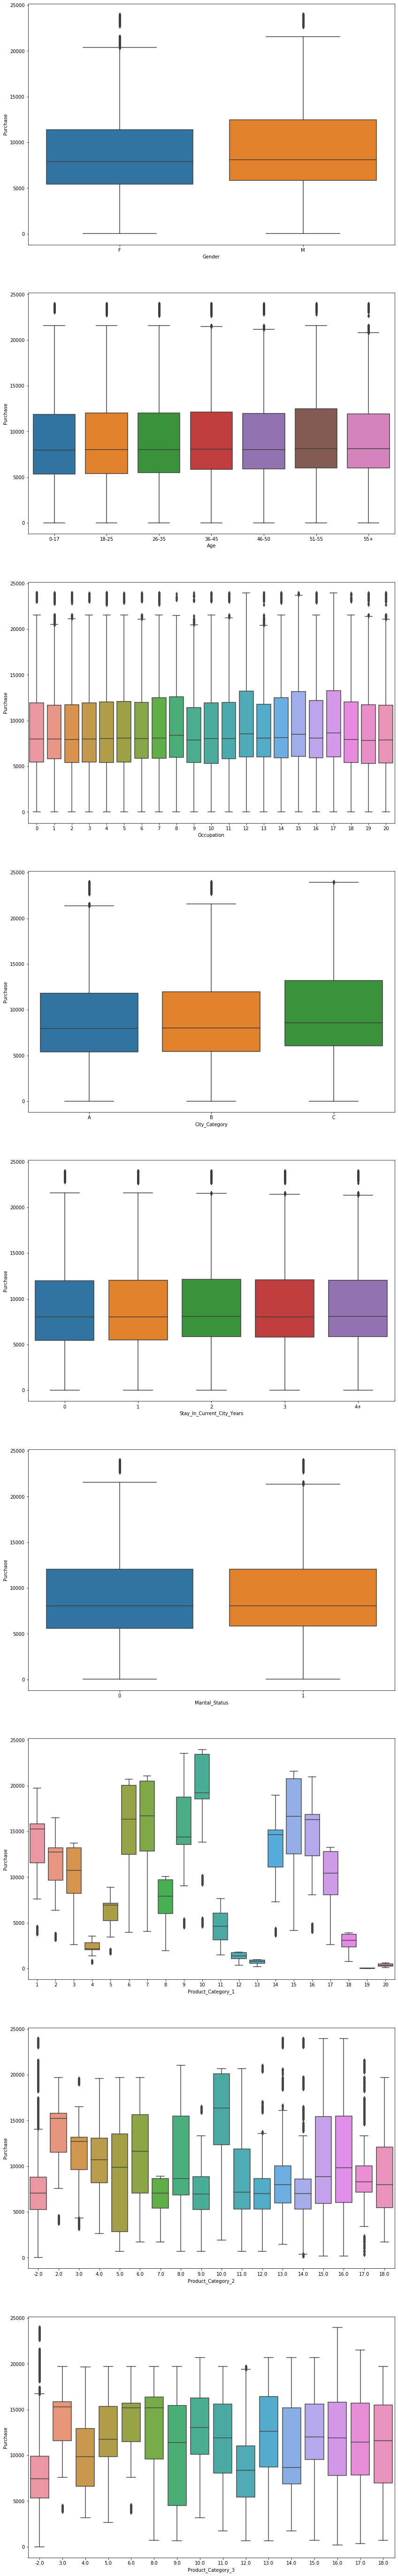

In [16]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(nrows = 9,ncols = 1,figsize = (14,100))
AX = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

for i,j in zip(cols,AX):
    sns.boxplot(x = i,y = 'Purchase',data = df,ax = j)

Inference
1. No outliers, can be seen with product categories vs purchase Box plot,i.e variable which were looking outliers in univariate analysis, are no more outlier when analysed using bivariate analysis with target variable.

Data preparation for model building
creating function to calculate 25% and 75% quantile

In [17]:
def p1(x):
    return x.quantile(0.25)

In [18]:
def p2(x):
    return x.quantile(0.75)

Creating features for User_id with purchase

In [19]:
df.groupby(['User_ID']).agg({'Purchase':['mean','sum','min','max','std','median',p1,p2]})

Purchase                                                        \
                 mean      sum   min    max          std   median        p1   
User_ID                                                                       
1000001   9545.514286   334093   612  19219  4639.871552   9946.0   7884.50   
1000002  10525.610390   810472   119  20657  4301.736734   9899.0   7818.00   
1000003  11780.517241   341635  3646  19631  5358.428805  12103.0   6953.00   
1000004  14747.714286   206468   481  19693  5801.640132  15852.5  15488.50   
1000005   7745.292453   821001  1938  21021  4110.717354   6168.0   4551.75   
...               ...      ...   ...    ...          ...      ...       ...   
1006036   8007.894942  4116058   137  23525  4403.756640   7483.0   5295.50   
1006037   9176.540984  1119538   579  23714  4582.640828   8063.5   5946.00   
1006038   7502.833333    90034   365  13565  3625.373381   6895.5   5814.00   
1006039   7977.283784   590319   490  23920  5141.586887   7153.0   5394.25   
1006040   9184.994444  1653299   945  23251  5242.108229   7973.0   5922.50   

                   
               p2  
User_ID            
1000001  12305.50  
1000002  11973.00  
1000003  15592.00  
1000004  19087.00  
1000005   8823.00  
...           ...  
1006036   9739.25  
1006037  12043.25  
1006038   9031.50  
1006039  10644.25  
1006040  11733.25  

[5891 rows x 8 columns]

In [ ]:
Appending test data set with train

In [20]:
df = df.append(t1,ignore_index=True)

C:\Users\somal\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [21]:
print(df.shape,t1.shape)

(783667, 12) (233599, 11)


In [22]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,-2.0,-2.0,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,-2.0,-2.0,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,-2.0,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,-2.0,-2.0,P00285442,7969.0,4+,1000002


Creating features ('mean','sum','min','max','std','median',p1-25% quantile,p2--75% quantile) for User_id, Product_ID,Product_Category_1,Product_Category_2,Product_Category_3 with purchase target variable

In [23]:
for i in ['User_ID','Product_ID','Product_Category_1', 'Product_Category_2', 'Product_Category_3'] : 

    grp = df.groupby(i).agg({'Purchase':['mean','sum','min','max','std','median',p1,p2]})
    grp.columns = [i+'_'.join(j) for j in grp.columns]
    df = df.merge(grp, how = 'left',on = i)

In [24]:
df.shape

(783667, 52)

In [25]:
grp.columns

Index(['Product_Category_3Purchase_mean', 'Product_Category_3Purchase_sum',
       'Product_Category_3Purchase_min', 'Product_Category_3Purchase_max',
       'Product_Category_3Purchase_std', 'Product_Category_3Purchase_median',
       'Product_Category_3Purchase_p1', 'Product_Category_3Purchase_p2'],
      dtype='object')

In [26]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,...,Product_Category_2Purchase_p1,Product_Category_2Purchase_p2,Product_Category_3Purchase_mean,Product_Category_3Purchase_sum,Product_Category_3Purchase_min,Product_Category_3Purchase_max,Product_Category_3Purchase_std,Product_Category_3Purchase_median,Product_Category_3Purchase_p1,Product_Category_3Purchase_p2
0,0-17,A,F,0,10,3,-2.0,-2.0,P00069042,8370.0,...,5254.00,8783.0,8221.836943,3.150994e+09,12.0,23961.0,4624.898598,7449.0,5328.0,9882.00
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,...,7060.25,15632.0,10052.594530,1.852492e+08,1714.0,20689.0,4916.310000,8653.0,6862.0,15212.25
2,0-17,A,F,0,10,12,-2.0,-2.0,P00087842,1422.0,...,5254.00,8783.0,8221.836943,3.150994e+09,12.0,23961.0,4624.898598,7449.0,5328.0,9882.00
3,0-17,A,F,0,10,12,14.0,-2.0,P00085442,1057.0,...,5317.00,8617.0,8221.836943,3.150994e+09,12.0,23961.0,4624.898598,7449.0,5328.0,9882.00
4,55+,C,M,0,16,8,-2.0,-2.0,P00285442,7969.0,...,5254.00,8783.0,8221.836943,3.150994e+09,12.0,23961.0,4624.898598,7449.0,5328.0,9882.00


In [27]:
df.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID',
       'User_IDPurchase_mean', 'User_IDPurchase_sum', 'User_IDPurchase_min',
       'User_IDPurchase_max', 'User_IDPurchase_std', 'User_IDPurchase_median',
       'User_IDPurchase_p1', 'User_IDPurchase_p2', 'Product_IDPurchase_mean',
       'Product_IDPurchase_sum', 'Product_IDPurchase_min',
       'Product_IDPurchase_max', 'Product_IDPurchase_std',
       'Product_IDPurchase_median', 'Product_IDPurchase_p1',
       'Product_IDPurchase_p2', 'Product_Category_1Purchase_mean',
       'Product_Category_1Purchase_sum', 'Product_Category_1Purchase_min',
       'Product_Category_1Purchase_max', 'Product_Category_1Purchase_std',
       'Product_Category_1Purchase_median', 'Product_Category_1Purchase_p1',
       'Product_Category_1Purchase_p2', 'Product_Category_2Purchase_mean'

calculating count of features

In [28]:
for i in ['User_ID','Product_ID','Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
        'Stay_In_Current_City_Years'] : 

    a = df.groupby(i).agg({i : 'count'}).rename(columns = {i : i + '_count'})
    df = df.merge(a, how = 'left',on = i)
    

In [29]:
df.dtypes

Age                                 object
City_Category                       object
Gender                              object
Marital_Status                       int64
Occupation                           int64
                                     ...  
Occupation_count                     int64
Product_Category_1_count             int64
Product_Category_2_count             int64
Product_Category_3_count             int64
Stay_In_Current_City_Years_count     int64
Length: 63, dtype: object

In [30]:
for i in ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Stay_In_Current_City_Years', 'User_ID']:
    df[i] = df[i].astype('category')

In [31]:
df.dtypes

Age                                 category
City_Category                       category
Gender                              category
Marital_Status                      category
Occupation                          category
                                      ...   
Occupation_count                       int64
Product_Category_1_count               int64
Product_Category_2_count               int64
Product_Category_3_count               int64
Stay_In_Current_City_Years_count       int64
Length: 63, dtype: object

In [32]:
df.shape

(783667, 63)

In [33]:
df = df.drop_duplicates()

In [34]:
df.shape

(783667, 63)

In [35]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,...,Product_ID_count,Age_count,City_Category_count,Gender_count,Marital_Status_count,Occupation_count,Product_Category_1_count,Product_Category_2_count,Product_Category_3_count,Stay_In_Current_City_Years_count
0,0-17,A,F,0,10,3,-2.0,-2.0,P00069042,8370.0,...,344,21334,210244,193636,462538,18304,28791,245982,545809,145427
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,...,845,21334,210244,193636,462538,18304,200699,23575,26283,145427
2,0-17,A,F,0,10,12,-2.0,-2.0,P00087842,1422.0,...,150,21334,210244,193636,462538,18304,5610,245982,545809,145427
3,0-17,A,F,0,10,12,14.0,-2.0,P00085442,1057.0,...,496,21334,210244,193636,462538,18304,5610,78834,545809,145427
4,55+,C,M,0,16,8,-2.0,-2.0,P00285442,7969.0,...,283,30579,243684,590031,462538,36122,162294,245982,545809,120671


In [36]:
df.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID',
       'User_IDPurchase_mean', 'User_IDPurchase_sum', 'User_IDPurchase_min',
       'User_IDPurchase_max', 'User_IDPurchase_std', 'User_IDPurchase_median',
       'User_IDPurchase_p1', 'User_IDPurchase_p2', 'Product_IDPurchase_mean',
       'Product_IDPurchase_sum', 'Product_IDPurchase_min',
       'Product_IDPurchase_max', 'Product_IDPurchase_std',
       'Product_IDPurchase_median', 'Product_IDPurchase_p1',
       'Product_IDPurchase_p2', 'Product_Category_1Purchase_mean',
       'Product_Category_1Purchase_sum', 'Product_Category_1Purchase_min',
       'Product_Category_1Purchase_max', 'Product_Category_1Purchase_std',
       'Product_Category_1Purchase_median', 'Product_Category_1Purchase_p1',
       'Product_Category_1Purchase_p2', 'Product_Category_2Purchase_mean'

In [37]:
df['User_ID'] = df['User_ID'].astype('category')

In [38]:
#no. of product bought by a user of product category 1
pc1=pd.pivot_table(df,index='User_ID',columns='Product_Category_1',values = 'Product_ID',aggfunc=len,fill_value = 0)

In [39]:
pc1.columns =  ['Product_Cateogry_1_count'+str(cols) for cols in pc1.columns.values]
pc1.reset_index()

,User_ID,Product_Cateogry_1_count1,Product_Cateogry_1_count2,Product_Cateogry_1_count3,Product_Cateogry_1_count4,Product_Cateogry_1_count5,Product_Cateogry_1_count6,Product_Cateogry_1_count7,Product_Cateogry_1_count8,Product_Cateogry_1_count9,...,Product_Cateogry_1_count11,Product_Cateogry_1_count12,Product_Cateogry_1_count13,Product_Cateogry_1_count14,Product_Cateogry_1_count15,Product_Cateogry_1_count16,Product_Cateogry_1_count17,Product_Cateogry_1_count18,Product_Cateogry_1_count19,Product_Cateogry_1_count20
0,1000001,4,2,15,3,4,1,0,12,0,...,0,3,0,1,0,1,0,0,0,1
1,1000002,46,2,0,0,18,6,0,34,0,...,0,0,0,0,0,0,0,0,0,1
2,1000003,19,6,3,0,11,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1000004,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1000005,26,3,1,3,32,10,5,59,0,...,5,0,0,2,1,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1006036,135,26,21,15,171,27,8,218,0,...,40,3,7,2,18,18,0,3,0,1
5887,1006037,20,2,1,2,43,8,0,52,0,...,6,0,5,1,4,13,0,1,0,0
5888,1006038,2,0,3,1,8,0,0,6,0,...,0,0,0,0,0,0,0,0,0,1
5889,1006039,7,4,13,4,43,1,0,10,0,...,0,7,7,0,1,0,0,0,0,1


In [40]:
#no. of product bought by a user of product category 2
pc2=pd.pivot_table(df,index='User_ID',columns='Product_Category_2',values = 'Product_ID',aggfunc=len,fill_value = 0)
#no. of product bought by a user of product category 3
pc3=pd.pivot_table(df,index='User_ID',columns='Product_Category_3',values = 'Product_ID',aggfunc=len,fill_value = 0)
pc2.columns =  ['Product_Cateogry_2_count'+str(cols) for cols in pc2.columns.values]
pc2.reset_index()
pc3.columns =  ['Product_Cateogry_3_count'+str(cols) for cols in pc3.columns.values]
pc3.reset_index()

,User_ID,Product_Cateogry_3_count-2.0,Product_Cateogry_3_count3.0,Product_Cateogry_3_count4.0,Product_Cateogry_3_count5.0,Product_Cateogry_3_count6.0,Product_Cateogry_3_count8.0,Product_Cateogry_3_count9.0,Product_Cateogry_3_count10.0,Product_Cateogry_3_count11.0,Product_Cateogry_3_count12.0,Product_Cateogry_3_count13.0,Product_Cateogry_3_count14.0,Product_Cateogry_3_count15.0,Product_Cateogry_3_count16.0,Product_Cateogry_3_count17.0,Product_Cateogry_3_count18.0
0,1000001,27,0,1,5,0,1,2,0,0,7,0,1,0,2,1,0
1,1000002,68,0,0,1,1,4,1,1,0,0,2,9,5,6,8,1
2,1000003,22,0,0,6,0,2,1,0,2,0,1,2,1,1,0,3
3,1000004,6,0,0,0,0,0,1,0,1,0,0,2,2,2,1,0
4,1000005,131,0,0,1,1,2,0,1,0,1,0,2,2,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1006036,562,1,0,10,3,8,5,2,2,5,6,24,40,36,11,4
5887,1006037,121,0,0,1,0,6,3,0,0,1,2,6,4,14,5,0
5888,1006038,17,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0
5889,1006039,65,0,0,3,0,3,3,0,0,10,2,7,1,4,3,2


In [41]:
df.shape

(783667, 63)

In [42]:
df = df.merge(pc1,how = 'left',on = 'User_ID')


In [43]:
df = df.merge(pc2,how = 'left',on = 'User_ID')
df = df.merge(pc3,how = 'left',on = 'User_ID')

In [44]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,...,Product_Cateogry_3_count9.0,Product_Cateogry_3_count10.0,Product_Cateogry_3_count11.0,Product_Cateogry_3_count12.0,Product_Cateogry_3_count13.0,Product_Cateogry_3_count14.0,Product_Cateogry_3_count15.0,Product_Cateogry_3_count16.0,Product_Cateogry_3_count17.0,Product_Cateogry_3_count18.0
0,0-17,A,F,0,10,3,-2.0,-2.0,P00069042,8370.0,...,2,0,0,7,0,1,0,2,1,0
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,...,2,0,0,7,0,1,0,2,1,0
2,0-17,A,F,0,10,12,-2.0,-2.0,P00087842,1422.0,...,2,0,0,7,0,1,0,2,1,0
3,0-17,A,F,0,10,12,14.0,-2.0,P00085442,1057.0,...,2,0,0,7,0,1,0,2,1,0
4,55+,C,M,0,16,8,-2.0,-2.0,P00285442,7969.0,...,1,1,0,0,2,9,5,6,8,1


In [45]:
df.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase',
       ...
       'Product_Cateogry_3_count9.0', 'Product_Cateogry_3_count10.0',
       'Product_Cateogry_3_count11.0', 'Product_Cateogry_3_count12.0',
       'Product_Cateogry_3_count13.0', 'Product_Cateogry_3_count14.0',
       'Product_Cateogry_3_count15.0', 'Product_Cateogry_3_count16.0',
       'Product_Cateogry_3_count17.0', 'Product_Cateogry_3_count18.0'],
      dtype='object', length=117)

transforming categories to numerical representation

In [46]:
df = pd.get_dummies(df,columns = ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Stay_In_Current_City_Years'],drop_first = True)

In [47]:
df.shape,df.columns

((783667, 193),
 Index(['Product_ID', 'Purchase', 'User_ID', 'User_IDPurchase_mean',
        'User_IDPurchase_sum', 'User_IDPurchase_min', 'User_IDPurchase_max',
        'User_IDPurchase_std', 'User_IDPurchase_median', 'User_IDPurchase_p1',
        ...
        'Product_Category_3_13.0', 'Product_Category_3_14.0',
        'Product_Category_3_15.0', 'Product_Category_3_16.0',
        'Product_Category_3_17.0', 'Product_Category_3_18.0',
        'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
        'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'],
       dtype='object', length=193))

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df_train = df[df['Purchase'].isnull() == False].copy()

In [50]:
df_test = df[df['Purchase'].isnull() == True].copy()

In [51]:
X = df_train.drop(columns = ['Product_ID', 'Purchase', 'User_ID'],axis = 1)

In [52]:
y = df_train['Purchase']

In [53]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
X.head()

,User_IDPurchase_mean,User_IDPurchase_sum,User_IDPurchase_min,User_IDPurchase_max,User_IDPurchase_std,User_IDPurchase_median,User_IDPurchase_p1,User_IDPurchase_p2,Product_IDPurchase_mean,Product_IDPurchase_sum,...,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,9545.514286,334093.0,612.0,19219.0,4639.871552,9946.0,7884.5,12305.5,11870.863436,2694686.0,...,0,0,0,0,0,0,0,1,0,0
1,9545.514286,334093.0,612.0,19219.0,4639.871552,9946.0,7884.5,12305.5,16304.030981,9472642.0,...,0,1,0,0,0,0,0,1,0,0
2,9545.514286,334093.0,612.0,19219.0,4639.871552,9946.0,7884.5,12305.5,1237.892157,126265.0,...,0,0,0,0,0,0,0,1,0,0
3,9545.514286,334093.0,612.0,19219.0,4639.871552,9946.0,7884.5,12305.5,1455.140762,496203.0,...,0,0,0,0,0,0,0,1,0,0
4,10525.610390,810472.0,119.0,20657.0,4301.736734,9899.0,7818.0,11973.0,7692.763547,1561631.0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
from xgboost import XGBRegressor

In [56]:
from sklearn import metrics

Wrapper method, selecting important features

In [57]:
rmse_err = []
y_pred_tot = []
i = 0
feature_importance_df = pd.DataFrame()
from sklearn.model_selection import KFold
fold = KFold(n_splits=5,random_state=1991,shuffle=True)
for train_index,test_index in fold.split(X,y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    m = XGBRegressor(learning_rate = 0.1,random_state = 1991,reg_alpha = 0.2)
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)],eval_metric = 'rmse')
    
    pred = m.predict(X_test)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df['feature'] = X_train.columns
    fold_importance_df['importance'] = m.feature_importances_
    fold_importance_df['fold'] = i+1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))
    rmse_err.append(np.sqrt(metrics.mean_squared_error(y_test,pred)))
    y_pred_tot.append(pred)
    i = i+1
    

C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:02:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9570.74
[1]	validation_0-rmse:8693.84
[2]	validation_0-rmse:7911.78
[3]	validation_0-rmse:7214.81
[4]	validation_0-rmse:6595.53
[5]	validation_0-rmse:6046.35
[6]	validation_0-rmse:5561.86
[7]	validation_0-rmse:5133.45
[8]	validation_0-rmse:4758.15
[9]	validation_0-rmse:4429.9
[10]	validation_0-rmse:4143.64
[11]	validation_0-rmse:3895.48
[12]	validation_0-rmse:3681.38
[13]	validation_0-rmse:3497.74
[14]	validation_0-rmse:3340.5
[15]	validation_0-rmse:3206.86
[16]	validation_0-rmse:3093.41
[17]	validation_0-rmse:2998.12
[18]	validation_0-rmse:2918.04
[19]	validation_0-rmse:2850.21
[20]	validation_0-rmse:2793.75
[21]	validation_0-rmse:2746.63
[22]	validation_0-rmse:2707.17
[23]	validation_0-rmse:2674.78
[24]	validation_0-rmse:2647.4
[25]	validation_0-rmse:2625.07
[26]	validation_0-rmse:2606.28
[27]	validat

C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:10:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9548.05
[1]	validation_0-rmse:8673.89
[2]	validation_0-rmse:7894.05
[3]	validation_0-rmse:7200.04
[4]	validation_0-rmse:6584.19
[5]	validation_0-rmse:6036.56
[6]	validation_0-rmse:5553.9
[7]	validation_0-rmse:5129.17
[8]	validation_0-rmse:4756.6
[9]	validation_0-rmse:4429.05
[10]	validation_0-rmse:4143.79
[11]	validation_0-rmse:3897.57
[12]	validation_0-rmse:3684.67
[13]	validation_0-rmse:3502.17
[14]	validation_0-rmse:3346.37
[15]	validation_0-rmse:3213.59
[16]	validation_0-rmse:3100.83
[17]	validation_0-rmse:3006
[18]	validation_0-rmse:2926.6
[19]	validation_0-rmse:2859.39
[20]	validation_0-rmse:2803.17
[21]	validation_0-rmse:2756.47
[22]	validation_0-rmse:2717.78
[23]	validation_0-rmse:2685.41
[24]	validation_0-rmse:2658.37
[25]	validation_0-rmse:2635.92
[26]	validation_0-rmse:2616.51
[27]	validation

C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:18:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9562.84
[1]	validation_0-rmse:8688.7
[2]	validation_0-rmse:7908.45
[3]	validation_0-rmse:7214.12
[4]	validation_0-rmse:6596.53
[5]	validation_0-rmse:6049.04
[6]	validation_0-rmse:5566.02
[7]	validation_0-rmse:5139.85
[8]	validation_0-rmse:4766.56
[9]	validation_0-rmse:4437.33
[10]	validation_0-rmse:4151.58
[11]	validation_0-rmse:3903.49
[12]	validation_0-rmse:3689.44
[13]	validation_0-rmse:3505.39
[14]	validation_0-rmse:3348.4
[15]	validation_0-rmse:3214.62
[16]	validation_0-rmse:3101.16
[17]	validation_0-rmse:3005.52
[18]	validation_0-rmse:2924.49
[19]	validation_0-rmse:2856.68
[20]	validation_0-rmse:2799.5
[21]	validation_0-rmse:2751.7
[22]	validation_0-rmse:2711.57
[23]	validation_0-rmse:2677.77
[24]	validation_0-rmse:2650.12
[25]	validation_0-rmse:2626.82
[26]	validation_0-rmse:2607.51
[27]	validati

C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:26:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9542.94
[1]	validation_0-rmse:8668.99
[2]	validation_0-rmse:7889.67
[3]	validation_0-rmse:7195.72
[4]	validation_0-rmse:6579.44
[5]	validation_0-rmse:6032.6
[6]	validation_0-rmse:5549.59
[7]	validation_0-rmse:5124.67
[8]	validation_0-rmse:4750.69
[9]	validation_0-rmse:4424.45
[10]	validation_0-rmse:4139.29
[11]	validation_0-rmse:3892.42
[12]	validation_0-rmse:3679.17
[13]	validation_0-rmse:3496.66
[14]	validation_0-rmse:3341.12
[15]	validation_0-rmse:3208.17
[16]	validation_0-rmse:3095.81
[17]	validation_0-rmse:3000.9
[18]	validation_0-rmse:2921.03
[19]	validation_0-rmse:2853.75
[20]	validation_0-rmse:2797.55
[21]	validation_0-rmse:2750.66
[22]	validation_0-rmse:2711.62
[23]	validation_0-rmse:2678.7
[24]	validation_0-rmse:2651.54
[25]	validation_0-rmse:2628.82
[26]	validation_0-rmse:2609.23
[27]	validat

C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:34:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9570.92
[1]	validation_0-rmse:8697.04
[2]	validation_0-rmse:7915.72
[3]	validation_0-rmse:7220.75
[4]	validation_0-rmse:6603.71
[5]	validation_0-rmse:6056
[6]	validation_0-rmse:5571.68
[7]	validation_0-rmse:5145.05
[8]	validation_0-rmse:4770.85
[9]	validation_0-rmse:4442.68
[10]	validation_0-rmse:4157.32
[11]	validation_0-rmse:3909.81
[12]	validation_0-rmse:3695.56
[13]	validation_0-rmse:3512.18
[14]	validation_0-rmse:3355.53
[15]	validation_0-rmse:3221.51
[16]	validation_0-rmse:3107.89
[17]	validation_0-rmse:3012.17
[18]	validation_0-rmse:2931.66
[19]	validation_0-rmse:2863.7
[20]	validation_0-rmse:2806.76
[21]	validation_0-rmse:2759.29
[22]	validation_0-rmse:2719.88
[23]	validation_0-rmse:2686.57
[24]	validation_0-rmse:2659.16
[25]	validation_0-rmse:2636.06
[26]	validation_0-rmse:2616.71
[27]	validati

In [58]:
feature_importance_df

,feature,importance,fold
0,User_IDPurchase_mean,0.025779,1
1,User_IDPurchase_sum,0.003627,1
2,User_IDPurchase_min,0.000228,1
3,User_IDPurchase_max,0.006735,1
4,User_IDPurchase_std,0.013054,1
...,...,...,...
185,Product_Category_3_18.0,0.000000,5
186,Stay_In_Current_City_Years_1,0.000000,5
187,Stay_In_Current_City_Years_2,0.000000,5
188,Stay_In_Current_City_Years_3,0.000000,5


In [59]:
ft = feature_importance_df.groupby(['feature']).agg({'importance':'mean'}).sort_values(by = 'importance', ascending=False)

In [60]:
ft_df = ft.reset_index()

In [61]:
ft_df

,feature,importance
0,Product_IDPurchase_mean,0.719819
1,User_IDPurchase_p2,0.031529
2,User_IDPurchase_mean,0.026152
3,Product_IDPurchase_p2,0.022379
4,User_IDPurchase_p1,0.020775
...,...,...
185,Product_Category_2_11.0,0.000000
186,Product_Category_2_12.0,0.000000
187,Product_Category_2_13.0,0.000000
188,Product_Category_2_14.0,0.000000


In [63]:
ft_df = ft_df[0:150]

In [64]:
ft_df

,feature,importance
0,Product_IDPurchase_mean,0.719819
1,User_IDPurchase_p2,0.031529
2,User_IDPurchase_mean,0.026152
3,Product_IDPurchase_p2,0.022379
4,User_IDPurchase_p1,0.020775
...,...,...
145,Product_Category_1_17,0.000000
146,Product_Category_1_18,0.000000
147,Product_Category_1_19,0.000000
148,Product_Category_3Purchase_max,0.000000


In [65]:
imp_feat = list(ft_df['feature'])

In [66]:
imp_feat

['Product_IDPurchase_mean',
 'User_IDPurchase_p2',
 'User_IDPurchase_mean',
 'Product_IDPurchase_p2',
 'User_IDPurchase_p1',
 'User_IDPurchase_std',
 'Product_IDPurchase_median',
 'User_IDPurchase_median',
 'Product_IDPurchase_p1',
 'Product_Category_1Purchase_mean',
 'Product_IDPurchase_max',
 'User_IDPurchase_max',
 'Product_Cateogry_1_count4',
 'Product_Cateogry_3_count6.0',
 'User_IDPurchase_sum',
 'Product_Cateogry_1_count10',
 'Product_IDPurchase_std',
 'Product_Cateogry_1_count5',
 'Product_Cateogry_1_count1',
 'Product_IDPurchase_min',
 'Product_Cateogry_2_count5.0',
 'Product_Cateogry_2_count14.0',
 'Product_Cateogry_2_count2.0',
 'Product_Cateogry_2_count6.0',
 'Gender_count',
 'Product_Cateogry_2_count10.0',
 'Product_Category_1Purchase_min',
 'Product_Cateogry_2_count17.0',
 'Product_Cateogry_1_count11',
 'Product_Category_1Purchase_std',
 'Product_Category_1Purchase_sum',
 'Product_Category_1Purchase_median',
 'Product_Cateogry_3_count8.0',
 'Product_Cateogry_2_count4.0',


In [67]:
df1 = X[imp_feat]

In [68]:
df1.shape

(550068, 150)

Checking high correlated features

In [69]:
df1_corr = df1.corr()

In [70]:
df1_corr

,Product_IDPurchase_mean,User_IDPurchase_p2,User_IDPurchase_mean,Product_IDPurchase_p2,User_IDPurchase_p1,User_IDPurchase_std,Product_IDPurchase_median,User_IDPurchase_median,Product_IDPurchase_p1,Product_Category_1Purchase_mean,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_3Purchase_max,Product_Category_2_2.0
Product_IDPurchase_mean,1.000000,0.211228,0.223574,0.989219,0.180606,0.133541,0.988329,0.213225,0.975657,0.939016,...,0.002713,0.024985,-0.001349,0.007436,0.015681,0.006891,-0.111421,-0.116879,-0.299091,0.319902
User_IDPurchase_p2,0.211228,1.000000,0.906565,0.210848,0.668175,0.676027,0.208532,0.789561,0.200940,0.202298,...,-0.013492,0.084415,-0.026103,0.030344,0.046581,0.004934,0.013658,0.006172,-0.096998,0.118994
User_IDPurchase_mean,0.223574,0.906565,1.000000,0.221026,0.868734,0.558084,0.221229,0.920074,0.217745,0.203415,...,-0.004540,0.080625,0.003124,0.033410,0.047815,0.004500,0.005275,0.007733,-0.090577,0.115700
Product_IDPurchase_p2,0.989219,0.210848,0.221026,1.000000,0.175495,0.133320,0.970036,0.211173,0.955507,0.947242,...,0.001478,0.025182,-0.003184,0.007263,0.014474,0.005229,-0.114231,-0.119169,-0.305427,0.315734
User_IDPurchase_p1,0.180606,0.668175,0.868734,0.175495,1.000000,0.188766,0.179422,0.824280,0.182670,0.149708,...,-0.001715,0.052236,0.041566,0.026784,0.041864,0.003174,-0.006255,0.009088,-0.062449,0.083936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Product_Category_1_17,0.006891,0.004934,0.004500,0.005229,0.003174,0.005667,0.005561,0.003241,0.011644,0.007338,...,0.000713,-0.001641,0.006617,-0.001988,0.003517,1.000000,-0.002452,-0.001753,0.018056,-0.010167
Product_Category_1_18,-0.111421,0.013658,0.005275,-0.114231,-0.006255,0.024370,-0.109561,0.002036,-0.100375,-0.118657,...,0.006768,-0.004616,0.005158,-0.000350,0.003271,-0.002452,1.000000,-0.004086,0.042081,-0.023695
Product_Category_1_19,-0.116879,0.006172,0.007733,-0.119169,0.009088,0.015471,-0.113722,0.013093,-0.106643,-0.124470,...,0.001230,0.004104,0.001857,0.001773,0.000126,-0.001753,-0.004086,1.000000,0.030097,-0.016947
Product_Category_3Purchase_max,-0.299091,-0.096998,-0.090577,-0.305427,-0.062449,-0.050964,-0.297369,-0.100394,-0.258753,-0.302882,...,0.005327,-0.012799,0.009208,0.000519,-0.006484,0.018056,0.042081,0.030097,1.000000,-0.427523


In [71]:
upper_corr = df1_corr.where(np.triu(np.ones(df1_corr.shape),k=1).astype(bool))

In [72]:
high_corr = [i for i in upper_corr.columns if any(upper_corr[i] > 0.9) or any(upper_corr[i] < -0.9)]

In [73]:
high_corr

['User_IDPurchase_mean',
 'Product_IDPurchase_p2',
 'Product_IDPurchase_median',
 'User_IDPurchase_median',
 'Product_IDPurchase_p1',
 'Product_Category_1Purchase_mean',
 'Product_IDPurchase_max',
 'Product_IDPurchase_std',
 'Product_IDPurchase_min',
 'Product_Cateogry_2_count2.0',
 'Product_Category_1Purchase_min',
 'Product_Category_1Purchase_std',
 'Product_Category_1Purchase_median',
 'Product_Cateogry_2_count-2.0',
 'Product_Cateogry_2_count8.0',
 'Product_Cateogry_3_count15.0',
 'Product_Cateogry_1_count8',
 'Product_Cateogry_2_count15.0',
 'Product_Cateogry_3_count16.0',
 'User_ID_count',
 'Product_Cateogry_1_count3',
 'Product_Cateogry_3_count-2.0',
 'Product_Cateogry_2_count16.0',
 'Product_Cateogry_3_count12.0',
 'Product_Cateogry_3_count14.0',
 'Stay_In_Current_City_Years_1',
 'Product_Category_1Purchase_max',
 'Product_Category_1Purchase_p1',
 'Product_Category_1Purchase_p2',
 'Gender_M',
 'City_Category_count',
 'Marital_Status_count']

removing high correlated features

In [74]:
final_feat = [i for i in df1.columns if i not in high_corr]

In [75]:
df1[final_feat]

,Product_IDPurchase_mean,User_IDPurchase_p2,User_IDPurchase_p1,User_IDPurchase_std,User_IDPurchase_max,Product_Cateogry_1_count4,Product_Cateogry_3_count6.0,User_IDPurchase_sum,Product_Cateogry_1_count10,Product_Cateogry_1_count5,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_3Purchase_max,Product_Category_2_2.0
0,11870.863436,12305.50,7884.50,4639.871552,19219.0,3,0,334093.0,0,4,...,0,0,0,0,0,0,0,0,23961.0,0
1,16304.030981,12305.50,7884.50,4639.871552,19219.0,3,0,334093.0,0,4,...,0,0,0,0,0,0,0,0,20689.0,0
2,1237.892157,12305.50,7884.50,4639.871552,19219.0,3,0,334093.0,0,4,...,0,0,0,0,0,0,0,0,23961.0,0
3,1455.140762,12305.50,7884.50,4639.871552,19219.0,3,0,334093.0,0,4,...,0,0,0,0,0,0,0,0,23961.0,0
4,7692.763547,11973.00,7818.00,4301.736734,20657.0,0,1,810472.0,0,18,...,0,0,0,0,0,0,0,0,23961.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,374.930705,16546.25,11490.50,4758.800385,19703.0,2,1,501843.0,0,0,...,0,0,1,0,0,0,0,0,23961.0,0
550064,374.266585,8224.50,2079.75,4996.953421,20144.0,13,2,956645.0,2,76,...,0,0,0,0,0,0,0,0,23961.0,0
550065,374.266585,9739.25,5295.50,4403.756640,23525.0,15,3,4116058.0,6,171,...,0,0,0,0,1,0,0,0,23961.0,0
550066,374.266585,9031.50,5814.00,3625.373381,13565.0,1,0,90034.0,0,8,...,0,0,0,0,0,0,0,0,23961.0,0


In [76]:
X_final = df1[final_feat]

In [77]:
y_final = y

In [78]:
X_final.shape,y_final.shape

((550068, 118), (550068,))

In [79]:
df_test

,Product_ID,Purchase,User_ID,User_IDPurchase_mean,User_IDPurchase_sum,User_IDPurchase_min,User_IDPurchase_max,User_IDPurchase_std,User_IDPurchase_median,User_IDPurchase_p1,...,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
550068,P00128942,NaN,1000004,14747.714286,206468.0,481.0,19693.0,5801.640132,15852.5,15488.50,...,0,0,0,0,0,0,0,1,0,0
550069,P00113442,NaN,1000009,10243.086207,594099.0,139.0,20278.0,4712.678775,9741.5,6160.75,...,0,0,0,0,0,0,0,0,0,0
550070,P00288442,NaN,1000010,9728.744395,2169510.0,24.0,20957.0,4376.092644,8824.0,6932.50,...,0,0,0,0,0,0,0,0,0,1
550071,P00145342,NaN,1000010,9728.744395,2169510.0,24.0,20957.0,4376.092644,8824.0,6932.50,...,0,0,0,0,0,0,0,0,0,1
550072,P00053842,NaN,1000011,7957.471429,557023.0,121.0,20175.0,4615.266625,7054.5,5248.50,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,NaN,1006036,8007.894942,4116058.0,137.0,23525.0,4403.756640,7483.0,5295.50,...,0,0,0,0,0,0,0,0,0,1
783663,P00254642,NaN,1006036,8007.894942,4116058.0,137.0,23525.0,4403.756640,7483.0,5295.50,...,0,0,0,0,0,0,0,0,0,1
783664,P00031842,NaN,1006036,8007.894942,4116058.0,137.0,23525.0,4403.756640,7483.0,5295.50,...,0,0,0,0,0,0,0,0,0,1
783665,P00124742,NaN,1006037,9176.540984,1119538.0,579.0,23714.0,4582.640828,8063.5,5946.00,...,0,0,0,0,0,0,0,0,0,1


In [80]:
X_test = df_test.drop(columns = ['Product_ID', 'Purchase', 'User_ID'],axis = 1)

In [81]:
X_test_final = X_test[final_feat]

In [82]:
X_test_final

,Product_IDPurchase_mean,User_IDPurchase_p2,User_IDPurchase_p1,User_IDPurchase_std,User_IDPurchase_max,Product_Cateogry_1_count4,Product_Cateogry_3_count6.0,User_IDPurchase_sum,Product_Cateogry_1_count10,Product_Cateogry_1_count5,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_3Purchase_max,Product_Category_2_2.0
550068,15781.118590,19087.00,15488.50,5801.640132,19693.0,0,0,206468.0,0,0,...,0,0,0,0,0,0,0,0,23961.0,0
550069,11746.665354,14720.50,6160.75,4712.678775,20278.0,0,0,594099.0,0,15,...,0,0,0,0,0,0,0,0,23961.0,0
550070,5731.338028,12845.50,6932.50,4376.092644,20957.0,11,3,2169510.0,0,117,...,0,0,0,0,0,0,0,0,23961.0,0
550071,1943.266667,12845.50,6932.50,4376.092644,20957.0,11,3,2169510.0,0,117,...,0,0,0,0,0,0,0,0,23961.0,0
550072,2585.590829,9784.50,5248.50,4615.266625,20175.0,3,0,557023.0,0,61,...,0,0,0,0,0,0,0,0,19706.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,8254.105960,9739.25,5295.50,4403.756640,23525.0,15,3,4116058.0,6,171,...,0,0,0,0,1,0,0,0,23961.0,0
783663,6550.075342,9739.25,5295.50,4403.756640,23525.0,15,3,4116058.0,6,171,...,0,0,0,0,1,0,0,0,23961.0,0
783664,10346.816754,9739.25,5295.50,4403.756640,23525.0,15,3,4116058.0,6,171,...,0,0,0,0,1,0,0,0,19706.0,0
783665,18139.306931,12043.25,5946.00,4582.640828,23714.0,2,0,1119538.0,5,43,...,0,0,0,0,0,0,0,0,23961.0,0


## XGBRegressor + StratifiedKfold

In [106]:
err = []
y_pred_xgb = []

from sklearn.model_selection import KFold, StratifiedKFold
fold = StratifiedKFold(n_splits= 5,random_state=1991,shuffle=True)
for train_index,test_index in fold.split(X_final,y_final):
    X_train,X_test = X_final.iloc[train_index],X_final.iloc[test_index]
    y_train,y_test = y_final.iloc[train_index],y_final.iloc[test_index]
    
    m = XGBRegressor(n_estimators=7000,random_state=1991,reg_alpha=0.2)
    m.fit(X_train,y_train,eval_set = [(X_test,y_test)],eval_metric = 'rmse',early_stopping_rounds = 100,verbose = 100)
    
    pred = m.predict(X_test)
    
    print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
    err.append(np.sqrt(metrics.mean_squared_error(y_test,pred)))
    p = m.predict(X_test_final)
    y_pred_xgb.append(p)

C:\Users\somal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:17:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9625.53
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:2492.98
[200]	validation_0-rmse:2472.25
[300]	validation_0-rmse:2463.73
[400]	validation_0-rmse:2458.36
[500]	validation_0-rmse:2454.74
[600]	validation_0-rmse:2451.86
[700]	validation_0-rmse:2448.9
[800]	validation_0-rmse:2446.62
[900]	validation_0-rmse:2445.2
[1000]	validation_0-rmse:2443.19
[1100]	validation_0-rmse:2441.89
[1200]	validation_0-rmse:2440.53
[1300]	validation_0-rmse:2439.19
[1400]	validation_0-rmse:2438.21
[1500]	validation_0-rmse:2436.77
[1600]	validation_0-rmse:2435.88
[1700]	validation_0-rmse:2435.24
[1800]	validation_0-rmse:2434.5
[1900]	validation_0-rmse:2433.92
[2000]	validation_0-rmse:2433.15
[2100]	validation_0-rmse:2432.84
[2200]	validation_0-rmse:2432.25
[2300]	validation_0-rmse:2

C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:47:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9580.45
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:2480.02
[200]	validation_0-rmse:2459.5
[300]	validation_0-rmse:2451.18
[400]	validation_0-rmse:2445.04
[500]	validation_0-rmse:2441.09
[600]	validation_0-rmse:2437.39
[700]	validation_0-rmse:2434.25
[800]	validation_0-rmse:2432.01
[900]	validation_0-rmse:2429.81
[1000]	validation_0-rmse:2428.01
[1100]	validation_0-rmse:2426.2
[1200]	validation_0-rmse:2424.3
[1300]	validation_0-rmse:2422.84
[1400]	validation_0-rmse:2421.62
[1500]	validation_0-rmse:2420.39
[1600]	validation_0-rmse:2419.41
[1700]	validation_0-rmse:2418.59
[1800]	validation_0-rmse:2417.55
[1900]	validation_0-rmse:2416.41
[2000]	validation_0-rmse:2415.45
[2100]	validation_0-rmse:2414.85
[2200]	validation_0-rmse:2413.95
[2300]	validation_0-rmse:2

C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:10:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9554.1
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:2471
[200]	validation_0-rmse:2450.26
[300]	validation_0-rmse:2441.23
[400]	validation_0-rmse:2435.11
[500]	validation_0-rmse:2429.95
[600]	validation_0-rmse:2426.02
[700]	validation_0-rmse:2423.32
[800]	validation_0-rmse:2420.27
[900]	validation_0-rmse:2418.31
[1000]	validation_0-rmse:2416.81
[1100]	validation_0-rmse:2414.97
[1200]	validation_0-rmse:2413.4
[1300]	validation_0-rmse:2411.98
[1400]	validation_0-rmse:2410.9
[1500]	validation_0-rmse:2410.01
[1600]	validation_0-rmse:2408.98
[1700]	validation_0-rmse:2408.26
[1800]	validation_0-rmse:2407.59
[1900]	validation_0-rmse:2406.93
[2000]	validation_0-rmse:2406.21
[2100]	validation_0-rmse:2405.66
[2200]	validation_0-rmse:2405.15
[2300]	validation_0-rmse:2404

C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:10:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9522.56
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:2449.83
[200]	validation_0-rmse:2426.76
[300]	validation_0-rmse:2416.54
[400]	validation_0-rmse:2411.38
[500]	validation_0-rmse:2406.69
[600]	validation_0-rmse:2402.89
[700]	validation_0-rmse:2400.06
[800]	validation_0-rmse:2397.6
[900]	validation_0-rmse:2395.19
[1000]	validation_0-rmse:2393.12
[1100]	validation_0-rmse:2391.15
[1200]	validation_0-rmse:2389.87
[1300]	validation_0-rmse:2388.54
[1400]	validation_0-rmse:2387.44
[1500]	validation_0-rmse:2386.16
[1600]	validation_0-rmse:2385.45
[1700]	validation_0-rmse:2384.58
[1800]	validation_0-rmse:2383.69
[1900]	validation_0-rmse:2382.44
[2000]	validation_0-rmse:2381.73
[2100]	validation_0-rmse:2381
[2200]	validation_0-rmse:2380.4
[2300]	validation_0-rmse:237

C:\Users\somal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:45:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9505.05
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:2459.47
[200]	validation_0-rmse:2438.9
[300]	validation_0-rmse:2429.08
[400]	validation_0-rmse:2423.6
[500]	validation_0-rmse:2419.1
[600]	validation_0-rmse:2415.9
[700]	validation_0-rmse:2412.99
[800]	validation_0-rmse:2410.84
[900]	validation_0-rmse:2408.8
[1000]	validation_0-rmse:2407.07
[1100]	validation_0-rmse:2405.51
[1200]	validation_0-rmse:2404.27
[1300]	validation_0-rmse:2403.28
[1400]	validation_0-rmse:2402.16
[1500]	validation_0-rmse:2401.15
[1600]	validation_0-rmse:2400.5
[1700]	validation_0-rmse:2399.66
[1800]	validation_0-rmse:2398.73
[1900]	validation_0-rmse:2397.91
[2000]	validation_0-rmse:2396.86
[2100]	validation_0-rmse:2395.73
[2200]	validation_0-rmse:2394.9
[2300]	validation_0-rmse:2394.

In [107]:
y_pred_xgb

[array([16914.885 , 11951.731 ,  6802.9785, ...,  8647.172 , 17307.988 ,
         2598.3325], dtype=float32),
 array([16021.015 , 11969.917 ,  6781.3345, ...,  8458.6455, 17555.988 ,
         2726.4236], dtype=float32),
 array([15741.555 , 12295.142 ,  6655.072 , ...,  8455.591 , 17281.25  ,
         2709.6262], dtype=float32),
 array([16586.465, 12114.632,  6950.779, ...,  8632.406, 17390.445,
         2607.84 ], dtype=float32),
 array([15851.443 , 12194.685 ,  6901.2397, ...,  8465.844 , 17314.463 ,
         2705.5886], dtype=float32)]

In [123]:
df_sub = pd.DataFrame()

In [124]:
df_sub['User_ID'] = df_test['User_ID']

In [125]:
df_sub['Product_ID'] = df_test['Product_ID']

In [126]:
df_sub['Purchase'] = np.mean(y_pred_xgb,0)

In [127]:
df_sub

,User_ID,Product_ID,Purchase
550068,1000004,P00128942,16586.464844
550069,1000009,P00113442,12114.631836
550070,1000010,P00288442,6950.778809
550071,1000010,P00145342,3000.364502
550072,1000011,P00053842,2547.272461
...,...,...,...
783662,1006036,P00118942,7636.582520
783663,1006036,P00254642,5979.540527
783664,1006036,P00031842,8632.406250
783665,1006037,P00124742,17390.445312


In [128]:
df_sub.to_csv('xgbreg_str5.csv',index=False)

## Catboost + stratifiedKfold

In [92]:
from catboost import CatBoostRegressor

In [103]:
y_pred_cat = []
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, StratifiedKFold
fold = StratifiedKFold(n_splits= 5,random_state=1991,shuffle=True)
for train_index,test_index in fold.split(X_final,y_final):
    X_train,X_test = X_final.iloc[train_index],X_final.iloc[test_index]
    y_train,y_test = y_final.iloc[train_index],y_final.iloc[test_index]
    c = CatBoostRegressor(iterations = 7000,verbose=50,early_stopping_rounds=100)
    c.fit(X_train,y_train,eval_set = [(X_test,y_test)])
    y_pred = c.predict(X_test_final)
    y_pred_cat.append(y_pred)

C:\Users\somal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0:	learn: 4903.7464784	test: 4971.2535298	best: 4971.2535298 (0)	total: 176ms	remaining: 20m 30s
50:	learn: 2738.2636124	test: 2773.5299941	best: 2773.5299941 (50)	total: 8.3s	remaining: 18m 51s
100:	learn: 2528.3478149	test: 2556.9828105	best: 2556.9828105 (100)	total: 16s	remaining: 18m 15s
150:	learn: 2492.5395755	test: 2521.0262036	best: 2521.0262036 (150)	total: 23.9s	remaining: 18m 4s
200:	learn: 2473.6558454	test: 2503.3224383	best: 2503.3224383 (200)	total: 31.6s	remaining: 17m 48s
250:	learn: 2460.7301656	test: 2491.8754124	best: 2491.8754124 (250)	total: 39.4s	remaining: 17m 40s
300:	learn: 2451.3538023	test: 2483.7942140	best: 2483.7942140 (300)	total: 47.5s	remaining: 17m 38s
350:	learn: 2444.4430435	test: 2477.8988787	best: 2477.8988787 (350)	total: 55.4s	remaining: 17m 29s
400:	learn: 2437.9961294	test: 2472.6254406	best: 2472.6254406 (400)	total: 1m 3s	remaining: 17m 25s
450:	learn: 2432.0180786	test: 2467.7173236	best: 2467.7173236 (450)	total: 1m 11s	remaining: 17m 24s

4000:	learn: 2308.5307162	test: 2412.7109247	best: 2412.7084955 (3999)	total: 12m 48s	remaining: 9m 36s
4050:	learn: 2307.4833741	test: 2412.4637001	best: 2412.4637001 (4050)	total: 12m 58s	remaining: 9m 26s
4100:	learn: 2306.4625988	test: 2412.3098471	best: 2412.3055906 (4099)	total: 13m 9s	remaining: 9m 17s
4150:	learn: 2305.4502025	test: 2412.1462580	best: 2412.1462580 (4150)	total: 13m 19s	remaining: 9m 9s
4200:	learn: 2304.4502717	test: 2411.9420419	best: 2411.9420419 (4200)	total: 13m 30s	remaining: 9m
4250:	learn: 2303.3998084	test: 2411.7206378	best: 2411.7206378 (4250)	total: 13m 41s	remaining: 8m 51s
4300:	learn: 2302.4639937	test: 2411.5482178	best: 2411.5429780 (4299)	total: 13m 52s	remaining: 8m 42s
4350:	learn: 2301.5086451	test: 2411.3554754	best: 2411.3554754 (4350)	total: 14m 3s	remaining: 8m 33s
4400:	learn: 2300.5159605	test: 2411.0958337	best: 2411.0955756 (4399)	total: 14m 13s	remaining: 8m 24s
4450:	learn: 2299.5467181	test: 2410.8327833	best: 2410.8327833 (4450)	

900:	learn: 2403.4193149	test: 2429.2970696	best: 2429.2970696 (900)	total: 3m 9s	remaining: 21m 21s
950:	learn: 2400.9184123	test: 2427.8099458	best: 2427.8099458 (950)	total: 3m 19s	remaining: 21m 12s
1000:	learn: 2398.4648213	test: 2426.4284164	best: 2426.4284164 (1000)	total: 3m 31s	remaining: 21m 4s
1050:	learn: 2396.1107683	test: 2425.0838571	best: 2425.0838571 (1050)	total: 3m 41s	remaining: 20m 53s
1100:	learn: 2393.8422218	test: 2423.9531708	best: 2423.9531708 (1100)	total: 3m 50s	remaining: 20m 34s
1150:	learn: 2391.7953842	test: 2422.9691240	best: 2422.9691240 (1150)	total: 3m 58s	remaining: 20m 11s
1200:	learn: 2389.6655509	test: 2421.7963868	best: 2421.7963868 (1200)	total: 4m 6s	remaining: 19m 48s
1250:	learn: 2387.6656576	test: 2420.7557702	best: 2420.7557702 (1250)	total: 4m 15s	remaining: 19m 33s
1300:	learn: 2385.6638662	test: 2419.7486397	best: 2419.7486397 (1300)	total: 4m 26s	remaining: 19m 26s
1350:	learn: 2383.7880046	test: 2418.7910545	best: 2418.7910545 (1350)	

4850:	learn: 2298.3277658	test: 2392.6020837	best: 2392.6005632 (4847)	total: 16m 50s	remaining: 7m 27s
4900:	learn: 2297.3641007	test: 2392.4107058	best: 2392.4034466 (4890)	total: 17m 1s	remaining: 7m 17s
4950:	learn: 2296.4474346	test: 2392.2315654	best: 2392.2250039 (4946)	total: 17m 12s	remaining: 7m 7s
5000:	learn: 2295.5310932	test: 2392.0556978	best: 2392.0556978 (5000)	total: 17m 23s	remaining: 6m 56s
5050:	learn: 2294.6084437	test: 2391.8934627	best: 2391.8934627 (5050)	total: 17m 33s	remaining: 6m 46s
5100:	learn: 2293.7098311	test: 2391.7178516	best: 2391.7178516 (5100)	total: 17m 44s	remaining: 6m 36s
5150:	learn: 2292.7924037	test: 2391.5256239	best: 2391.5256239 (5150)	total: 17m 55s	remaining: 6m 25s
5200:	learn: 2291.9063096	test: 2391.4115101	best: 2391.4115101 (5200)	total: 18m 5s	remaining: 6m 15s
5250:	learn: 2291.0329277	test: 2391.2302036	best: 2391.2302036 (5250)	total: 18m 16s	remaining: 6m 5s
5300:	learn: 2290.1626353	test: 2391.0884931	best: 2391.0884931 (530

1800:	learn: 2371.1191984	test: 2401.9949153	best: 2401.9949153 (1800)	total: 6m 20s	remaining: 18m 17s
1850:	learn: 2369.5817014	test: 2401.2533171	best: 2401.2533171 (1850)	total: 6m 30s	remaining: 18m 7s
1900:	learn: 2368.0013711	test: 2400.5304681	best: 2400.5304681 (1900)	total: 6m 41s	remaining: 17m 57s
1950:	learn: 2366.6077184	test: 2399.9898023	best: 2399.9898023 (1950)	total: 6m 52s	remaining: 17m 46s
2000:	learn: 2365.1120630	test: 2399.3330951	best: 2399.3330951 (2000)	total: 7m 2s	remaining: 17m 36s
2050:	learn: 2363.5711697	test: 2398.7220763	best: 2398.7220763 (2050)	total: 7m 13s	remaining: 17m 26s
2100:	learn: 2362.1530026	test: 2398.1657793	best: 2398.1657793 (2100)	total: 7m 25s	remaining: 17m 18s
2150:	learn: 2360.7170657	test: 2397.5488649	best: 2397.5488649 (2150)	total: 7m 35s	remaining: 17m 7s
2200:	learn: 2359.2933639	test: 2397.0074486	best: 2397.0074486 (2200)	total: 7m 46s	remaining: 16m 57s
2250:	learn: 2358.0139421	test: 2396.5819702	best: 2396.5819702 (22

5750:	learn: 2284.9358124	test: 2378.9123576	best: 2378.9123576 (5750)	total: 20m 26s	remaining: 4m 26s
5800:	learn: 2284.1104079	test: 2378.7627649	best: 2378.7593742 (5797)	total: 20m 36s	remaining: 4m 15s
5850:	learn: 2283.2608126	test: 2378.6803171	best: 2378.6710999 (5846)	total: 20m 48s	remaining: 4m 5s
5900:	learn: 2282.4492083	test: 2378.5392467	best: 2378.5392467 (5900)	total: 20m 58s	remaining: 3m 54s
5950:	learn: 2281.5824419	test: 2378.4112838	best: 2378.4100412 (5948)	total: 21m 9s	remaining: 3m 43s
6000:	learn: 2280.7205727	test: 2378.2825701	best: 2378.2825701 (6000)	total: 21m 20s	remaining: 3m 33s
6050:	learn: 2279.8690761	test: 2378.1677542	best: 2378.1677542 (6050)	total: 21m 31s	remaining: 3m 22s
6100:	learn: 2279.0477740	test: 2378.0355534	best: 2378.0355534 (6100)	total: 21m 41s	remaining: 3m 11s
6150:	learn: 2278.1931580	test: 2377.8011387	best: 2377.8011387 (6150)	total: 21m 49s	remaining: 3m
6200:	learn: 2277.3541679	test: 2377.6334177	best: 2377.6334177 (6200)

2700:	learn: 2351.4870655	test: 2368.4408326	best: 2368.4408326 (2700)	total: 9m 26s	remaining: 15m 1s
2750:	learn: 2350.2345488	test: 2368.0625675	best: 2368.0625675 (2750)	total: 9m 37s	remaining: 14m 51s
2800:	learn: 2349.0456999	test: 2367.7794198	best: 2367.7794198 (2800)	total: 9m 47s	remaining: 14m 40s
2850:	learn: 2347.8860740	test: 2367.4153128	best: 2367.4153128 (2850)	total: 9m 58s	remaining: 14m 31s
2900:	learn: 2346.6519802	test: 2367.0625849	best: 2367.0625849 (2900)	total: 10m 9s	remaining: 14m 21s
2950:	learn: 2345.4895564	test: 2366.7250955	best: 2366.7250955 (2950)	total: 10m 20s	remaining: 14m 10s
3000:	learn: 2344.2323828	test: 2366.3250697	best: 2366.3250697 (3000)	total: 10m 31s	remaining: 14m 1s
3050:	learn: 2343.0260728	test: 2365.9664566	best: 2365.9664566 (3050)	total: 10m 42s	remaining: 13m 51s
3100:	learn: 2341.8015726	test: 2365.6605114	best: 2365.6605114 (3100)	total: 10m 53s	remaining: 13m 41s
3150:	learn: 2340.6799848	test: 2365.3798451	best: 2365.379845

6650:	learn: 2275.3897742	test: 2353.2725322	best: 2353.2725322 (6650)	total: 23m 19s	remaining: 1m 13s
6700:	learn: 2274.6039757	test: 2353.1811899	best: 2353.1811899 (6700)	total: 23m 29s	remaining: 1m 2s
6750:	learn: 2273.8213392	test: 2353.1189081	best: 2353.1180511 (6748)	total: 23m 39s	remaining: 52.4s
6800:	learn: 2273.0547472	test: 2353.0391512	best: 2353.0332286 (6791)	total: 23m 50s	remaining: 41.9s
6850:	learn: 2272.2555117	test: 2352.9500474	best: 2352.9341878 (6837)	total: 24m 2s	remaining: 31.4s
6900:	learn: 2271.4938693	test: 2352.8289157	best: 2352.8289157 (6900)	total: 24m 13s	remaining: 20.8s
6950:	learn: 2270.7509495	test: 2352.7426701	best: 2352.7426701 (6950)	total: 24m 23s	remaining: 10.3s
6999:	learn: 2270.0044883	test: 2352.6193828	best: 2352.6158558 (6992)	total: 24m 30s	remaining: 0us

bestTest = 2352.615856
bestIteration = 6992

Shrink model to first 6993 iterations.
0:	learn: 4928.2486475	test: 4872.4990130	best: 4872.4990130 (0)	total: 181ms	remaining: 21m 

3550:	learn: 2329.5230123	test: 2376.7993799	best: 2376.7993799 (3550)	total: 12m 46s	remaining: 12m 24s
3600:	learn: 2328.4565637	test: 2376.6095179	best: 2376.6095179 (3600)	total: 12m 57s	remaining: 12m 13s
3650:	learn: 2327.4079239	test: 2376.3999804	best: 2376.3999804 (3650)	total: 13m 8s	remaining: 12m 2s
3700:	learn: 2326.3610275	test: 2376.2017766	best: 2376.2017766 (3700)	total: 13m 19s	remaining: 11m 52s
3750:	learn: 2325.3756581	test: 2375.9819313	best: 2375.9819313 (3750)	total: 13m 29s	remaining: 11m 41s
3800:	learn: 2324.2881010	test: 2375.7028741	best: 2375.7010834 (3798)	total: 13m 40s	remaining: 11m 30s
3850:	learn: 2323.2642884	test: 2375.5134912	best: 2375.5133373 (3849)	total: 13m 52s	remaining: 11m 20s
3900:	learn: 2322.1459853	test: 2375.2618104	best: 2375.2618104 (3900)	total: 14m 3s	remaining: 11m 9s
3950:	learn: 2321.0944897	test: 2375.1298391	best: 2375.1245763 (3947)	total: 14m 13s	remaining: 10m 59s
4000:	learn: 2320.1138187	test: 2374.8862808	best: 2374.886

In [104]:
df_sub = pd.DataFrame()
df_sub['User_ID'] = df_test['User_ID']
df_sub['Product_ID'] = df_test['Product_ID']
df_sub['Purchase'] = np.mean(y_pred_cat,0)

In [105]:
df_sub.to_csv('catboost_str3.csv',index=False)

## LGBM + StratifiedKFold

In [100]:
y_pred_lgbm = []
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, StratifiedKFold
fold = StratifiedKFold(n_splits= 5,random_state=1991,shuffle=True)
for train_index,test_index in fold.split(X_final,y_final):
    X_train,X_test = X_final.iloc[train_index],X_final.iloc[test_index]
    y_train,y_test = y_final.iloc[train_index],y_final.iloc[test_index]
    l = LGBMRegressor(n_estimators= 7000)
    l.fit(X_train,y_train,eval_set = [(X_test,y_test)],eval_metric='rmse',verbose=50,early_stopping_rounds=100)
    y_pred = l.predict(X_test_final)
    y_pred_lgbm.append(y_pred)

C:\Users\somal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 2473.36	valid_0's l2: 6.11753e+06
[100]	valid_0's rmse: 2447.17	valid_0's l2: 5.98865e+06
[150]	valid_0's rmse: 2439.09	valid_0's l2: 5.94914e+06
[200]	valid_0's rmse: 2434.6	valid_0's l2: 5.92726e+06
[250]	valid_0's rmse: 2431.43	valid_0's l2: 5.91183e+06
[300]	valid_0's rmse: 2428.56	valid_0's l2: 5.8979e+06
[350]	valid_0's rmse: 2426.61	valid_0's l2: 5.88842e+06
[400]	valid_0's rmse: 2424.95	valid_0's l2: 5.88039e+06
[450]	valid_0's rmse: 2423.24	valid_0's l2: 5.87207e+06
[500]	valid_0's rmse: 2421.55	valid_0's l2: 5.86392e+06
[550]	valid_0's rmse: 2420.41	valid_0's l2: 5.85838e+06
[600]	valid_0's rmse: 2419.44	valid_0's l2: 5.85369e+06
[650]	valid_0's rmse: 2418.66	valid_0's l2: 5.8499e+06
[700]	valid_0's rmse: 2417.08	valid_0's l2: 5.84226e+06
[750]	valid_0's rmse: 2416.01	valid_0's l2: 5.83712e+06
[800]	valid_0's rmse: 2415.48	valid_0's l2: 5.83452e+06
[850]	valid_0's rmse: 2414.88	valid_0's l2: 5.

[1200]	valid_0's rmse: 2362.9	valid_0's l2: 5.58329e+06
[1250]	valid_0's rmse: 2362.66	valid_0's l2: 5.58217e+06
[1300]	valid_0's rmse: 2362.23	valid_0's l2: 5.58014e+06
[1350]	valid_0's rmse: 2361.65	valid_0's l2: 5.5774e+06
[1400]	valid_0's rmse: 2361.45	valid_0's l2: 5.57645e+06
[1450]	valid_0's rmse: 2361.34	valid_0's l2: 5.57592e+06
[1500]	valid_0's rmse: 2361.13	valid_0's l2: 5.57491e+06
[1550]	valid_0's rmse: 2360.96	valid_0's l2: 5.57412e+06
[1600]	valid_0's rmse: 2360.53	valid_0's l2: 5.57209e+06
[1650]	valid_0's rmse: 2360.21	valid_0's l2: 5.57057e+06
[1700]	valid_0's rmse: 2360.02	valid_0's l2: 5.56969e+06
[1750]	valid_0's rmse: 2359.95	valid_0's l2: 5.56938e+06
[1800]	valid_0's rmse: 2359.88	valid_0's l2: 5.56905e+06
[1850]	valid_0's rmse: 2359.96	valid_0's l2: 5.56942e+06
[1900]	valid_0's rmse: 2359.7	valid_0's l2: 5.56816e+06
[1950]	valid_0's rmse: 2359.98	valid_0's l2: 5.5695e+06
[2000]	valid_0's rmse: 2359.82	valid_0's l2: 5.56874e+06
Early stopping, best iteration is:


In [101]:
df_sub = pd.DataFrame()
df_sub['User_ID'] = df_test['User_ID']
df_sub['Product_ID'] = df_test['Product_ID']
df_sub['Purchase'] = np.mean(y_pred_lgbm,0)

In [102]:
df_sub.to_csv('lgbm_str3.csv',index=False)

## Stacking

In [129]:
df_sub = pd.DataFrame()
df_sub['User_ID'] = df_test['User_ID']
df_sub['Product_ID'] = df_test['Product_ID']

In [130]:
df_sub['Purchase'] = (np.mean(y_pred_xgb,0)+np.mean(y_pred_cat,0)+np.mean(y_pred_lgbm,0))/3

In [132]:
df_sub.to_csv('stacked.csv',index=False)

# Ranked 84
## among 19000+ participant 
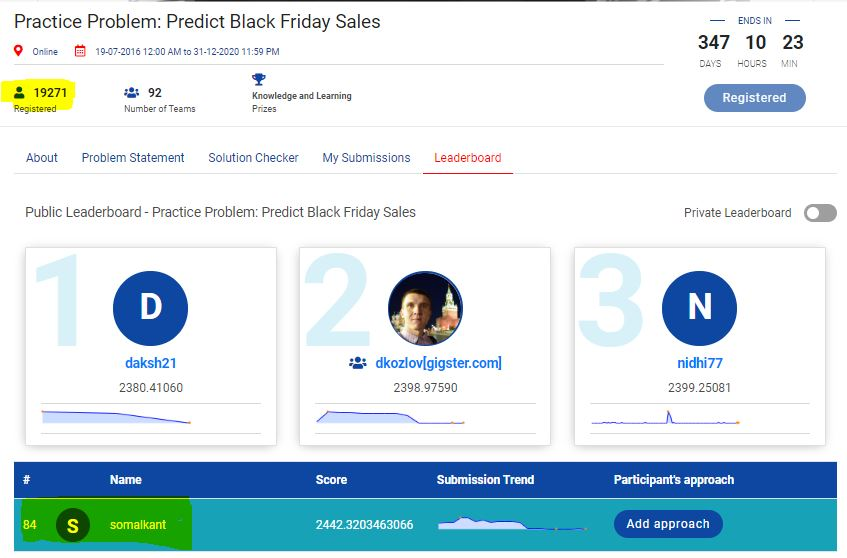